<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/PICD_Perceptr%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa Intensivo en Ciencia de Datos de los Fundamentos al Deep Learning** 💻

---

## **Módulo 3**: *Redes Neuronales Artificiales* 🧠🤖

---

<table>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Dra. Nidiyare Hevia Montiel: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a>
      <br>
      <br>
      Dra. Blanca Vázquez Gómez: <a href= "mailto:blanca.vazquez@iimas.unam.mx">blanca.vazquez@iimas.unam.mx</a>
      <br>
      <br>
      Ing. Gabriel Carcedo Rodríguez: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a> </h4>
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://arbioiimas.github.io/ArBio"><img src="https://arbioiimas.github.io/ArBio/images/logo_arbio.png" alt="Artificial Intelligence in Biomedicine Group (ArBio)" style="width:80%; height:auto;"></a>
    </td>
  </tr>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Programa impartido por el <a href="https://www.iimas.unam.mx/">Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas, IIMAS, UNAM</a>.
      <br>
      <br>
      Para mayor información visite el <a href="https://www.iimas.unam.mx/educacioncontinua/curso_deep_learning.html">sitio oficial</a>.
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://www.iimas.unam.mx/educacioncontinua/"><img src="https://www.iimas.unam.mx/educacioncontinua/images/logo.svg" alt="Educación Continua, IIMAS, UNAM" style="width:100%; height:auto;"></a></h4>
    </td>
  </tr>
</table>

---
---

# Paquetes y Librerías 📚

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Funciones de activación 📈

In [2]:
def step(n):
    return np.where(n >= 0, 1, 0)

def stepSym(n):
    return np.where(n < 0, -1, 1)

def linear(n):
    return np.array(n)

def linearSat(n):
    return np.clip(n, 0, 1)

def linearSatSym(n):
    return np.clip(n, -1, 1)

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def tanh(n):
    return np.tanh(n)

def relu(n):
    return np.maximum(0, n)

def leakyRelu(n):
    return np.where(n < 0, 0.01 * n, n)

def elu(n):
    return np.where(n < 0, 0.01 * (np.exp(n) - 1), n)

def softmax(n):
    return np.exp(n) / np.sum(np.exp(n))

def softPlus(n):
    return np.log(1 + np.exp(n))

def logSigmoid(n):
    return np.log(1 / (1 + np.exp(-n)))

def hyperbTanhSigmoid(n):
    return np.tanh(logSigmoid(n))


---
# **Perceptrón Multicapa (MLP)**
---

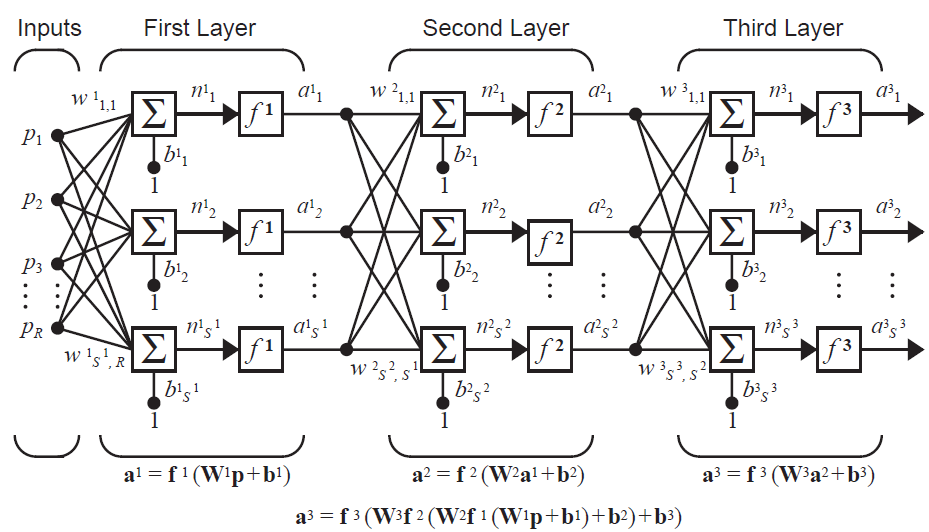

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el Dataset

In [4]:
# Número de registros
samples = 2000

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100
extracurriculares = np.random.randint(0, 10, samples)  # actividades extracurriculares de 0 a 10

# Etiquetas
aceptado = ((promedios > 6.5) & (calif_examen > 6)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1
beca = ((promedios > 7) & (calif_examen > 7) & (extracurriculares > 4)).astype(int)  # regla: si promedio > 8 y examen > 80 y actividades extracurriculares > 5 → beca=1

# Visualizar los registros
#for idx in range(samples):
#  print(f"Promedio: {promedios[idx]:.2f}, Examen: {calif_examen[idx]:.2f}, Extracurriculares: {extracurriculares[idx]}, Aceptado: {aceptado[idx]}, Beca: {beca[idx]}")

# Visualizar el Dataset

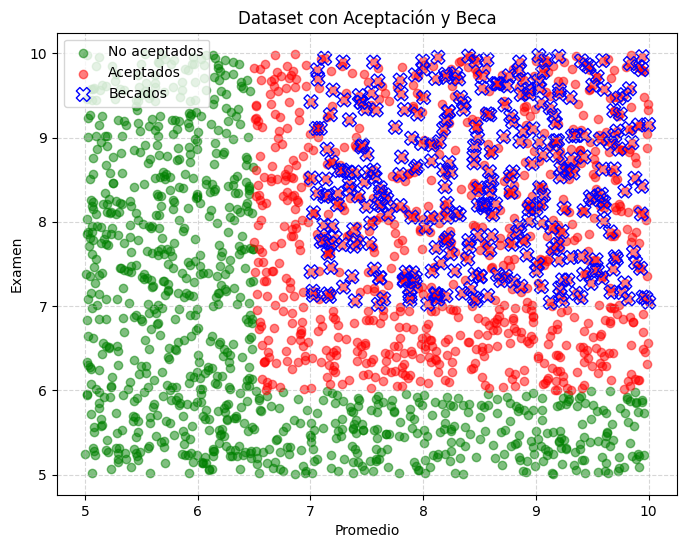

In [5]:
# Visualización
plt.figure(figsize=(8, 6))
colors = ['r', 'g']

# Aceptados
plt.scatter(promedios[aceptado == 0], calif_examen[aceptado == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(promedios[aceptado == 1], calif_examen[aceptado == 1], c=colors[0], label='Aceptados', alpha=0.5)

# Becados
beca_indices = np.where(beca == 1)[0]
plt.scatter(promedios[beca_indices], calif_examen[beca_indices], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')

plt.legend()

plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Dataset con Aceptación y Beca")
plt.grid(ls='--', alpha=0.5)
plt.show()

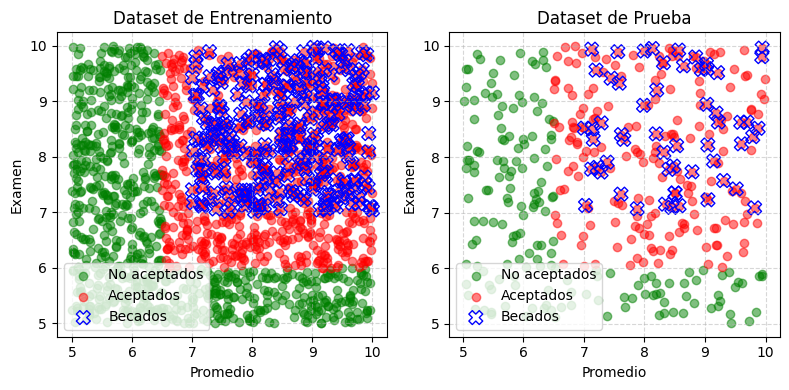

In [6]:
from sklearn.model_selection import train_test_split

# Dataset
P = np.column_stack((promedios, calif_examen, extracurriculares))  # (n, 3)
A = np.column_stack((aceptado, beca))   #  (n, 2)

P_train, P_test, A_train, A_test = train_test_split(P, A, test_size=0.2, random_state=1)

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(P_train[:, 0][A_train[:, 0] == 0], P_train[:, 1][A_train[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_train[:, 0][A_train[:, 0] == 1], P_train[:, 1][A_train[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_train[:, 0][A_train[:, 1] == 1], P_train[:, 1][A_train[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Entrenamiento")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(1,2,2)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Inicialización de parámetros

In [8]:
# Hiperparámetros
np.random.seed(1)
entrada_size = 3
oculta_size = 4
salida_size = 2

W1 = np.random.rand(entrada_size, oculta_size)
b1 = np.random.rand(1, oculta_size)
W2 = np.random.rand(oculta_size, salida_size)
b2 = np.random.rand(1, salida_size)

lr = 0.1
epochs = 10000

print("Pesos y Biases iniciales:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

Pesos y Biases iniciales:
W1: [[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]]
b1: [[0.20445225 0.87811744 0.02738759 0.67046751]]
W2: [[0.4173048  0.55868983]
 [0.14038694 0.19810149]
 [0.80074457 0.96826158]
 [0.31342418 0.69232262]]
b2: [[0.87638915 0.89460666]]


### Función sumatoria

In [9]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # Producto punto

### Función derivada para Propagación hacia atrás

In [10]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

def relu_derivative(n):
    return (n > 0).astype(float)

def tanh_derivative(n):
    return 1 - np.tanh(n)**2

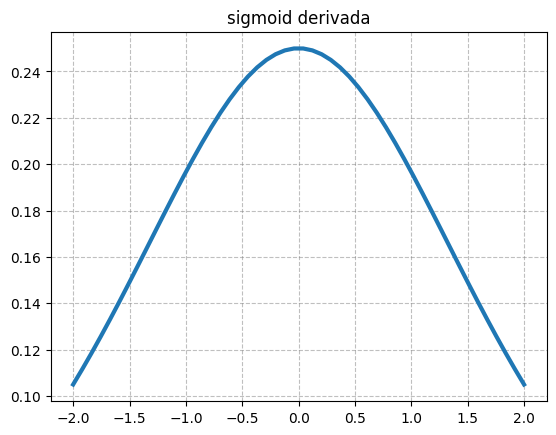

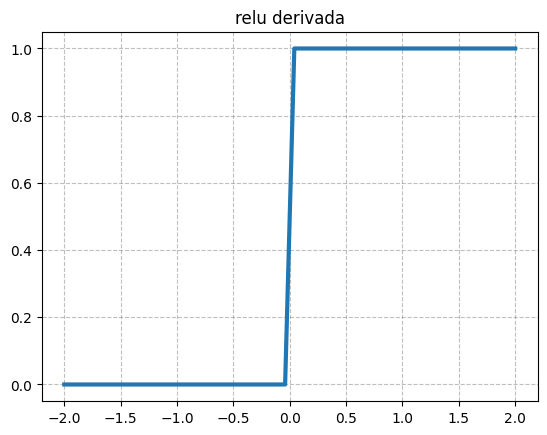

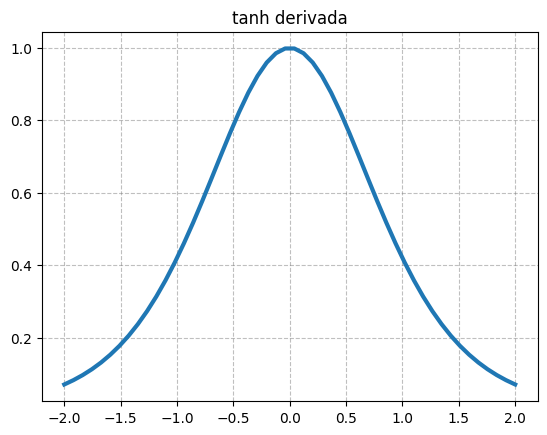

In [11]:
funciones_derivadas = {
    'sigmoid derivada': sigmoid_derivative,
    'relu derivada': relu_derivative,
    'tanh derivada': tanh_derivative
}

x = np.linspace(-2,2)

for k,v in funciones_derivadas.items():
    plt.plot(x, v(x), lw=3)
    plt.title(k)
    plt.grid(ls='--', c='gray', alpha=0.5)
    plt.show()

# Entrenamiento

In [12]:
losses, accs = [], []

for epoch in range(epochs):
    # Forward
    n1 = SumMult(P_train, W1, b1)  # (n, 4)
    a1 = relu(n1)          # (n, 4)
    n2 = SumMult(a1, W2, b2)  # (n, 2)
    a2 = sigmoid(n2)       # (n, 2)

    # Loss (MSE)
    loss = np.mean((A_train - a2)**2)
    losses.append(loss)

    # Backpropagation
    dn2 = (a2 - A_train) * sigmoid_derivative(n2)  # (n, 2)
    dW2 = np.dot(a1.T, dn2) / samples
    db2 = np.sum(dn2, axis=0, keepdims=True) / samples

    dn1 = np.dot(dn2, W2.T) * relu_derivative(n1)  # (n, 4)
    dW1 = np.dot(P_train.T, dn1) / samples
    db1 = np.sum(dn1, axis=0, keepdims=True) / samples

    # Actualización
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    preds = (a2 > 0.5).astype(int)
    acc = np.mean(preds == A_train)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, Acc={acc:.4f}")

    accs.append(acc)

    # Factor de parada
    if acc == 1:
        break

Epoch 0: Loss=0.6519, Acc=0.3478
Epoch 500: Loss=0.5415, Acc=0.3463
Epoch 1000: Loss=0.1923, Acc=0.7294
Epoch 1500: Loss=0.1803, Acc=0.7672
Epoch 2000: Loss=0.1627, Acc=0.8119
Epoch 2500: Loss=0.1587, Acc=0.7681
Epoch 3000: Loss=0.1517, Acc=0.7744
Epoch 3500: Loss=0.1461, Acc=0.7819
Epoch 4000: Loss=0.1411, Acc=0.7863
Epoch 4500: Loss=0.1366, Acc=0.7913
Epoch 5000: Loss=0.1318, Acc=0.7984
Epoch 5500: Loss=0.1275, Acc=0.8013
Epoch 6000: Loss=0.1228, Acc=0.8053
Epoch 6500: Loss=0.1062, Acc=0.8422
Epoch 7000: Loss=0.0707, Acc=0.9072
Epoch 7500: Loss=0.0599, Acc=0.9234
Epoch 8000: Loss=0.0566, Acc=0.9253
Epoch 8500: Loss=0.0558, Acc=0.9228
Epoch 9000: Loss=0.0533, Acc=0.9250
Epoch 9500: Loss=0.0505, Acc=0.9309


# Visualizando convergencias

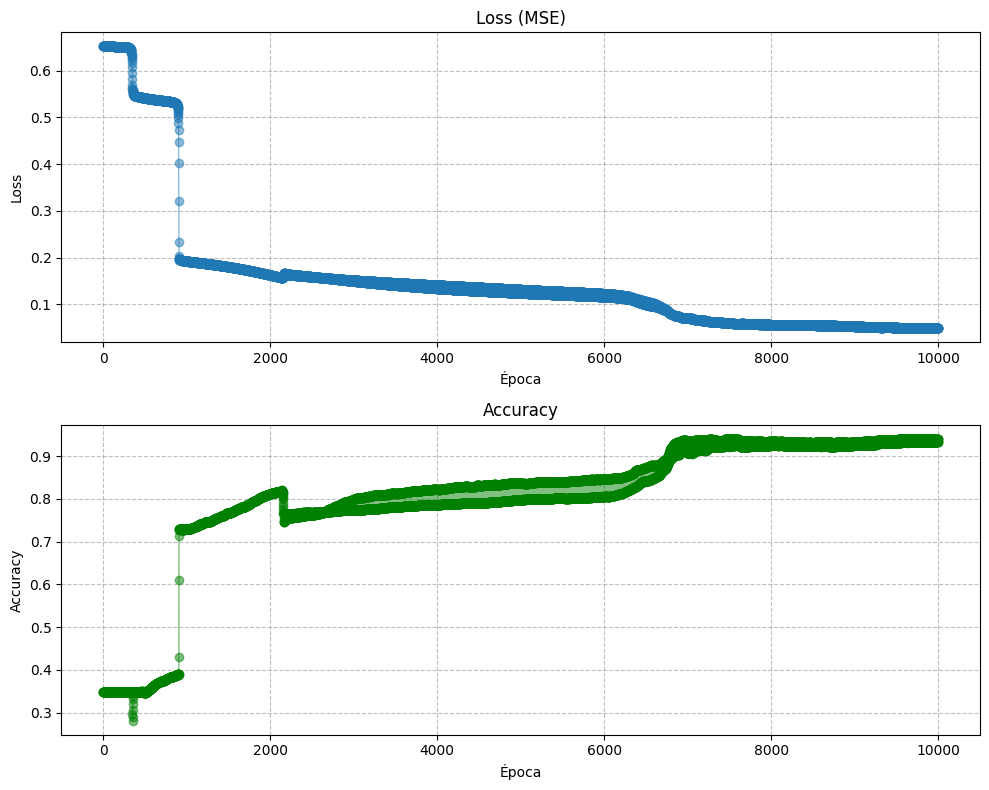

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
plt.plot(losses, marker="o", lw=1, alpha=0.5)
plt.title("Loss (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.subplot(2,1,2)
plt.plot(accs, marker="o", color="g", lw=1, alpha=0.5)
plt.title("Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

# **Test:**

In [14]:
# Test con P_test y A_test

n1 = SumMult(P_test, W1, b1)
a1 = relu(n1)
n2 = SumMult(a1, W2, b2)
a2 = sigmoid(n2)

preds = (a2 > 0.5).astype(int)
acc = np.mean(preds == A_test)
print(f"Test Accuracy: {acc:.3f}")


Test Accuracy: 0.932


# Visualizar predicciones

In [15]:
preds_correctas_aceptado = np.where(preds[:, 0] == A_test[:, 0])[0]
preds_incorrectas_aceptado = np.where(preds[:, 0] != A_test[:, 0])[0]

preds_correctas_beca = np.where(preds[:, 1] == A_test[:, 1])[0]
preds_incorrectas_beca = np.where(preds[:, 1] != A_test[:, 1])[0]

preds_correctas_ambas = np.intersect1d(preds_correctas_aceptado, preds_correctas_beca)
preds_incorrectas_ambas = np.setdiff1d(np.arange(len(P_test)), preds_correctas_ambas)


print("Predichas correctamente (Aceptación):", len(preds_correctas_aceptado))
print("Predichas incorrectamente (Aceptación):", len(preds_incorrectas_aceptado))
print("Predichas correctamente (Beca):", len(preds_correctas_beca))
print("Predichas incorrectamente (Beca):", len(preds_incorrectas_beca))
print("Predichas correctamente (Ambos):", len(preds_correctas_ambas))
print("Predichas incorrectamente (Al menos uno incorrecto):", len(preds_incorrectas_ambas))

Predichas correctamente (Aceptación): 372
Predichas incorrectamente (Aceptación): 28
Predichas correctamente (Beca): 374
Predichas incorrectamente (Beca): 26
Predichas correctamente (Ambos): 348
Predichas incorrectamente (Al menos uno incorrecto): 52


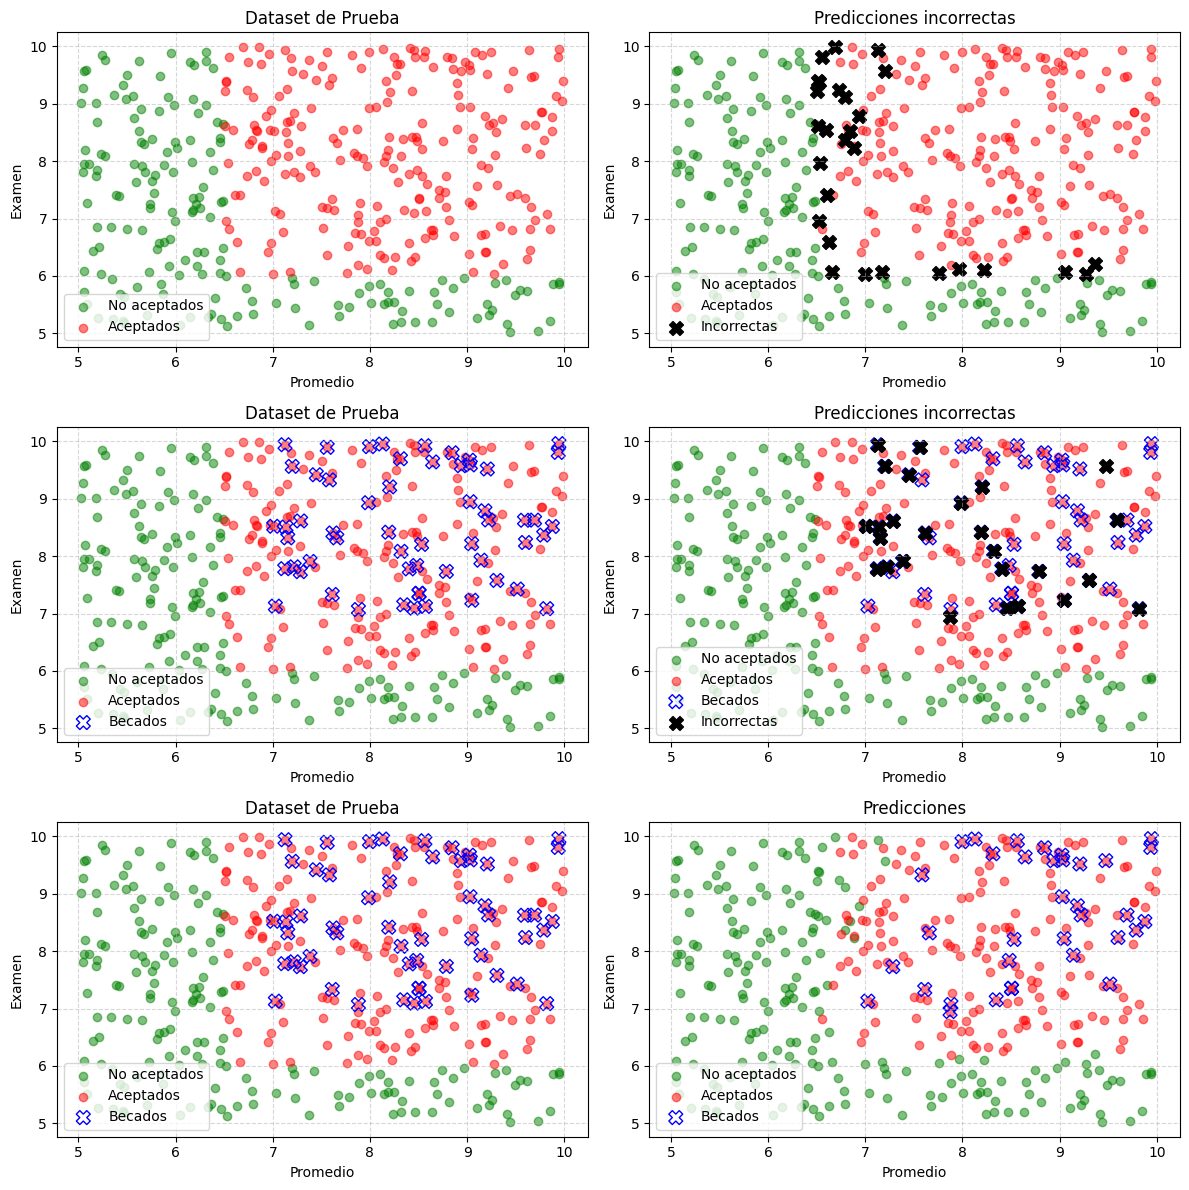

In [16]:
# Comparar las predicciones de aceptación

plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(3,2,2)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][preds_incorrectas_aceptado], P_test[:, 1][preds_incorrectas_aceptado], facecolors='black', marker='X', s=100, label='Incorrectas')
plt.title("Predicciones incorrectas")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(3,2,3)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(3,2,4)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.scatter(P_test[:, 0][preds_incorrectas_beca], P_test[:, 1][preds_incorrectas_beca], facecolors='black', marker='X', s=100, label='Incorrectas')
plt.title("Predicciones incorrectas")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(3,2,5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(3,2,6)
plt.scatter(P_test[:, 0][preds[:, 0] == 0], P_test[:, 1][preds[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][preds[:, 0] == 1], P_test[:, 1][preds[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][preds[:, 1] == 1], P_test[:, 1][preds[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Predicciones")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

---
# **Ejercicio Final**: Mejora tu Perceptrón Multicapa 🧠🤖
---
El objetivo de este ejercicio es **experimentar** con el perceptrón multicapa y mejorar su rendimiento en la clasificación.

## Instrucciones:

- 📌 **Arquitectura**
  - Agrega más **neuronas en la capa oculta**.
  - Prueba con **más de una capa oculta**.
  - Analiza los resultados.

- 📌 **Funciones de activación**
  - Sustituye las funciones de activación.
  - Compara cuál se ajusta mejor a los datos.

- 📌 **Hiperparámetros**
  - Cambia la **tasa de aprendizaje (lr)**.
  - Aumenta o disminuye el número de **épocas**.
  - Observa cómo afecta la **convergencia** de la pérdida.

- 📌 **Visualización**
  - Muestra las curvas de **Loss** y **Accuracy** en cada caso.
  - Compara cómo varían al modificar la arquitectura o hiperparámetros.

In [ ]:
# Codifica aquí